In [2]:
# Run the selected line by pressing Shift+Enter in Jupyter Notebook or a Python IDE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



In [5]:
#---------------------------------------#
# Set up a working directory
#---------------------------------------#
# Change working directory if needed (Not required in Python script)

#---------------------------------------#
# Read input data
#---------------------------------------#
datafe = pd.read_excel("data_FrenchEconomy.xlsx")


In [6]:
#---------------------------------------#
# Descriptive statistics
#---------------------------------------#
print(datafe.info())  # Page22
print(datafe.describe())  # Page23
print(datafe.corr())  # Page24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    11 non-null     int64  
 1   import  11 non-null     float64
 2   doprod  11 non-null     float64
 3   stock   11 non-null     float64
 4   consum  11 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes
None
              year     import      doprod      stock      consum
count    11.000000  11.000000   11.000000  11.000000   11.000000
mean   1954.000000  21.890909  194.590909   3.300000  139.736364
std       3.316625   4.543667   29.999515   1.649242   20.634402
min    1949.000000  15.900000  149.300000   0.700000  108.100000
25%    1951.500000  18.900000  173.500000   2.150000  125.050000
50%    1954.000000  20.400000  190.700000   3.100000  137.700000
75%    1956.500000  26.400000  219.250000   4.600000  158.200000
max    1959.000000  28.100000  239.000000   5.600000  167.6

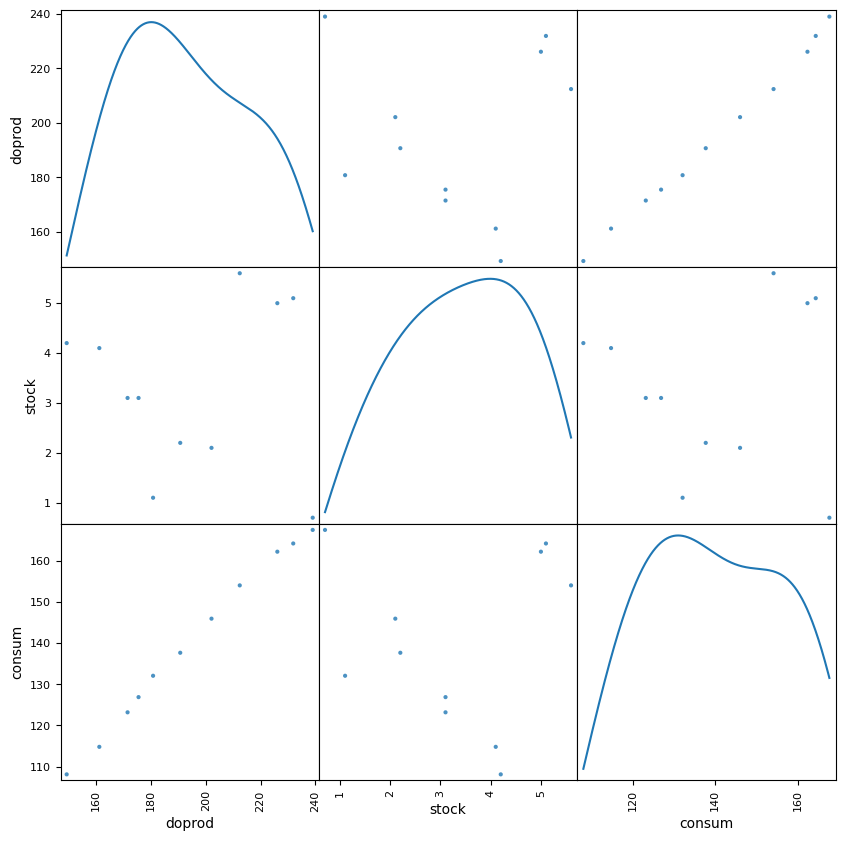

In [7]:
# Pair plot equivalent in Python
pd.plotting.scatter_matrix(datafe.iloc[:, 2:5], alpha=0.8, figsize=(10, 10), diagonal='kde')
plt.show()  # Page23

In [8]:
#---------------------------------------#
# PCA by the "PCA" class in scikit-learn
#---------------------------------------#
scaler = StandardScaler()
datafe_scaled = scaler.fit_transform(datafe.iloc[:, 2:5])  # Scaling before PCA

pca = PCA()
pc = pca.fit_transform(datafe_scaled)


In [9]:
# Print PCA results
print(f'Explained variance ratio:\n{pca.explained_variance_ratio_}')
print(f'Components (loadings):\n{pca.components_}')  # Page25


Explained variance ratio:
[0.66638498 0.33271806 0.00089696]
Components (loadings):
[[-0.70633041 -0.04350059 -0.70654444]
 [ 0.03568867 -0.99902908  0.02583046]
 [ 0.70698208  0.00697079 -0.7071971 ]]


In [10]:
# Cumulative proportion
cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative Proportion for PC1: {cumulative_proportion[0]}')
print(f'Cumulative Proportion for PC2: {cumulative_proportion[1]}')

Cumulative Proportion for PC1: 0.6663849781665764
Cumulative Proportion for PC2: 0.9991030368482965


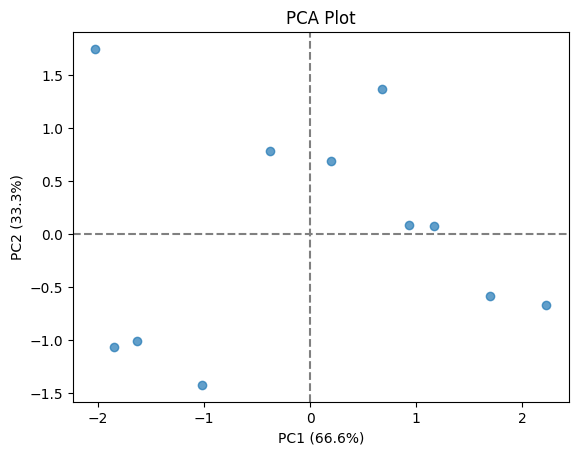

In [11]:
# Plot PCs
plt.figure()
plt.scatter(pc[:, 0], pc[:, 1], alpha=0.7)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('PC1 (66.6%)')
plt.ylabel('PC2 (33.3%)')
plt.title('PCA Plot')
plt.show()  # Page25

In [12]:
#---------------------------------------#
# Linear model with Principal Component Analysis (PCA)
#---------------------------------------#
# Regression on original data
X = datafe[['doprod', 'stock', 'consum']]
y = datafe['import']
lm_x = LinearRegression().fit(X, y)
print(f'Linear Model Coefficients:\n{lm_x.coef_}')
print(f'Intercept: {lm_x.intercept_}')

Linear Model Coefficients:
[-0.05139616  0.58694904  0.28684868]
Intercept: -10.127988155231051


In [13]:
# Drop1 equivalent in Python: Checking p-values for each feature
from statsmodels.api import OLS, add_constant
X_with_const = add_constant(X)
model = OLS(y, X_with_const).fit()
print(model.summary())  # Equivalent to `drop1(lm.x, test="F")`

                            OLS Regression Results                            
Dep. Variable:                 import   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     285.6
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.11e-07
Time:                        03:45:43   Log-Likelihood:                -5.2501
No. Observations:                  11   AIC:                             18.50
Df Residuals:                       7   BIC:                             20.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1280      1.212     -8.355      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
#---------------------------------------#
# Linear model with Ys and Z
#---------------------------------------#
Ys = (datafe['import'] - datafe['import'].mean()) / datafe['import'].std()
YY = scaler.fit_transform(datafe[['import']])  # Standardizing

Z1 = scaler.fit_transform(datafe[['doprod']])
Z2 = scaler.fit_transform(datafe[['stock']])
Z3 = scaler.fit_transform(datafe[['consum']])

lm_z = LinearRegression().fit(np.column_stack([Z1, Z2, Z3]), Ys)
print(f'Linear Model Coefficients (Z):\n{lm_z.coef_}')
print(f'Intercept: {lm_z.intercept_}')  # Page28


Linear Model Coefficients (Z):
[-0.3235505   0.20313372  1.24205808]
Intercept: -8.13966003696762e-16


In [15]:
#---------------------------------------#
# Linear model with Ys and PC
#---------------------------------------#
pc1 = pc[:, 0]
pc2 = pc[:, 1]
pc3 = pc[:, 2]

In [16]:
# Use all PCs
lm_pc123 = LinearRegression().fit(np.column_stack([pc1, pc2, pc3]), Ys)
print(f'Linear Model Coefficients (PC123):\n{lm_pc123.coef_}')
print(f'Intercept: {lm_pc123.intercept_}')  # Page29

Linear Model Coefficients (PC123):
[-0.65787211 -0.18240065 -1.10570828]
Intercept: 3.358055557752046e-16


In [17]:
# Use 1st PC only
lm_pc1 = LinearRegression().fit(pc1.reshape(-1, 1), Ys)
print(f'Linear Model Coefficients (PC1):\n{lm_pc1.coef_}')
print(f'Intercept: {lm_pc1.intercept_}')  # Page29

Linear Model Coefficients (PC1):
[-0.65787211]
Intercept: 2.841912792384504e-16


In [18]:
# Use 1st and 2nd PC
lm_pc12 = LinearRegression().fit(np.column_stack([pc1, pc2]), Ys)
print(f'Linear Model Coefficients (PC12):\n{lm_pc12.coef_}')
print(f'Intercept: {lm_pc12.intercept_}')  # Page29


Linear Model Coefficients (PC12):
[-0.65787211 -0.18240065]
Intercept: 2.841912792384504e-16


In [19]:
#---------------------------------------#
# Conversions between alpha, ceta, and beta
#---------------------------------------#
# Change from the alpha coefficients to the ceta coefficients
alpha = lm_pc123.coef_
eigenvector = pca.components_

In [20]:
# Use all 3 PC
ceta1_lm_pc123 = np.sum(eigenvector[0, :] * alpha)
ceta2_lm_pc123 = np.sum(eigenvector[1, :] * alpha)
ceta3_lm_pc123 = np.sum(eigenvector[2, :] * alpha)

print(f'ceta1 (PC123): {ceta1_lm_pc123}')
print(f'ceta2 (PC123): {ceta2_lm_pc123}')
print(f'ceta3 (PC123): {ceta3_lm_pc123}')

ceta1 (PC123): 1.2538416574269025
ceta2 (PC123): 0.13018402531927464
ceta3 (PC123): 0.31557841852218


In [21]:
# Alternatively
ceta1_lm_pc123_alternatively = np.sum(eigenvector[0, :] * lm_pc123.coef_)
ceta2_lm_pc123_alternatively = np.sum(eigenvector[1, :] * lm_pc123.coef_)
ceta3_lm_pc123_alternatively = np.sum(eigenvector[2, :] * lm_pc123.coef_)

print(f'Alternative ceta1 (PC123): {ceta1_lm_pc123_alternatively}')
print(f'Alternative ceta2 (PC123): {ceta2_lm_pc123_alternatively}')
print(f'Alternative ceta3 (PC123): {ceta3_lm_pc123_alternatively}')

Alternative ceta1 (PC123): 1.2538416574269025
Alternative ceta2 (PC123): 0.13018402531927464
Alternative ceta3 (PC123): 0.31557841852218


In [22]:
# Use 1st PC
ceta1_lm_pc1 = np.sum(eigenvector[0, 0] * lm_pc1.coef_[0])
ceta2_lm_pc1 = np.sum(eigenvector[1, 0] * lm_pc1.coef_[0])
ceta3_lm_pc1 = np.sum(eigenvector[2, 0] * lm_pc1.coef_[0])

print(f'ceta1 (PC1): {ceta1_lm_pc1}')
print(f'ceta2 (PC1): {ceta2_lm_pc1}')
print(f'ceta3 (PC1): {ceta3_lm_pc1}')

ceta1 (PC1): 0.4646750814912744
ceta2 (PC1): -0.02347858133325537
ceta3 (PC1): -0.46510379722890627


In [23]:
# Use 1st and 2nd PC
ceta1_lm_pc12 = np.sum(eigenvector[0, :2] * lm_pc12.coef_[:2])
ceta2_lm_pc12 = np.sum(eigenvector[1, :2] * lm_pc12.coef_[:2])
ceta3_lm_pc12 = np.sum(eigenvector[2, :2] * lm_pc12.coef_[:2])

print(f'ceta1 (PC12): {ceta1_lm_pc12}')
print(f'ceta2 (PC12): {ceta2_lm_pc12}')
print(f'ceta3 (PC12): {ceta3_lm_pc12}')

ceta1 (PC12): 0.4726096183831651
ceta2 (PC12): 0.15874497535214793
ceta3 (PC12): -0.46637527474244594
